In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Expert/Downloads/iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


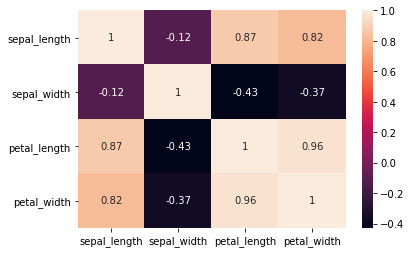

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df["species"]=df["species"].map({"setosa":0,"versicolor":1,"virginica":2})

In [12]:
from sklearn.cluster import KMeans

# Elbow method

In [15]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

In [14]:
help(KMeans())

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for

# Elbow plot

([<matplotlib.axis.XTick at 0x11c4ead5e20>,
 <a list of 10 Text major ticklabel objects>)

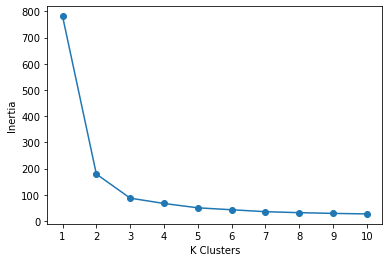

In [17]:
plt.plot(k,ssd,marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)

In [18]:
# 3 is selected as optimal k value

In [19]:
model=KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [20]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
model.n_iter_

6

In [22]:
output=df
output["Labels"]=model.labels_

In [23]:
output.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Labels
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


# selecting two important features for visualization of clusters

In [24]:
#selecting sepal_length and sepal_width as two important features

In [25]:
df1=df[["sepal_length","sepal_width"]]

In [26]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df1)
    ssd.append(model.inertia_)

# Elbow plot

([<matplotlib.axis.XTick at 0x11c4ebf34c0>,
 <a list of 10 Text major ticklabel objects>)

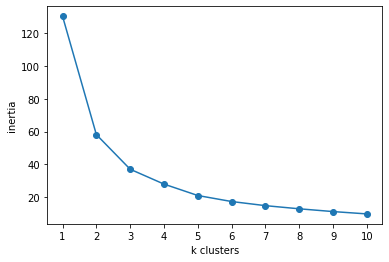

In [29]:
plt.plot(k,ssd,marker="o")
plt.xlabel("k clusters")
plt.ylabel("inertia")
plt.xticks(k)

In [35]:
model=KMeans(n_clusters=5)
model.fit(df1)

KMeans(n_clusters=5)

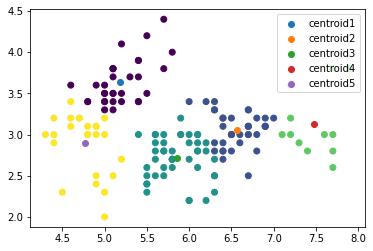

In [36]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=model.labels_)
centroid=model.cluster_centers_
for i in range(len(centroid)):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.legend()    